In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

**Run the below cell two times if you get error when you run the next cell**

In [ ]:
!pip3 install auto-sklearn

In [95]:
import autosklearn
import autosklearn.regression as reg

In [1]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token  = {"username":"<Username>","key":"<API key>"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d jillanisofttech/flight-price-prediction-dataset
!unzip flight-price-prediction-dataset.zip

  0% 0.00/602k [00:00<?, ?B/s]
100% 602k/602k [00:00<00:00, 114MB/s]
Archive:  flight-price-prediction-dataset.zip
  inflating: Data_Train.xlsx         
  inflating: Test_set.xlsx           


In [71]:
df_train = pd.read_excel("/content/Data_Train.xlsx")
df_test = pd.read_excel("/content/Data_Train.xlsx")
frames = [df_train, df_test]
df = pd.concat(frames)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**Data Analysis & Feature Extraction**

**Load The Train and Test Data**

We are merging the train and test data as one df to perform ETL and analysis under one hood 

**Checking Price coorelation with respect to the Airline carrier**

<function matplotlib.pyplot.show(*args, **kw)>

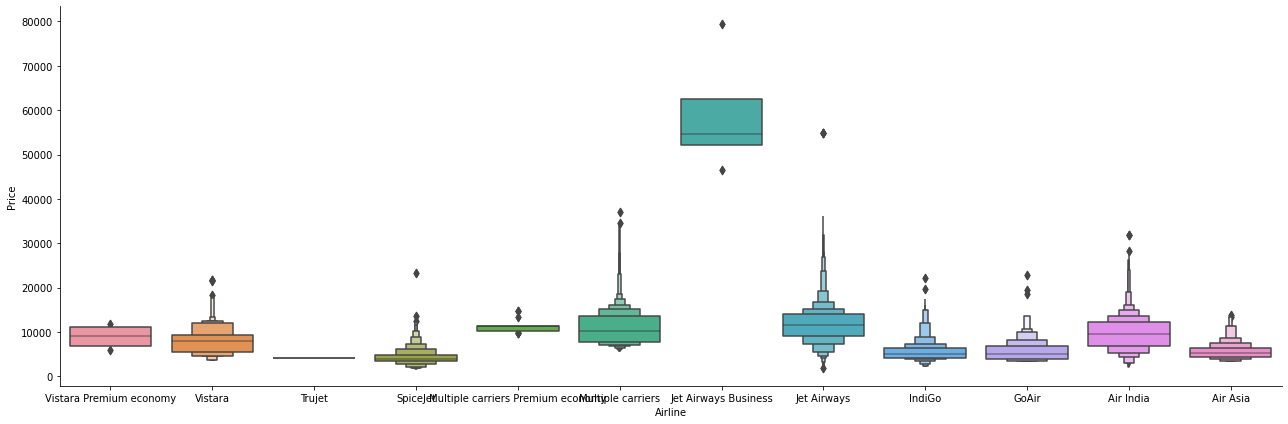

In [72]:
sns.catplot(y='Price',x='Airline',data= df.sort_values('Airline',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

**Checking price vs Total Stops**

<function matplotlib.pyplot.show(*args, **kw)>

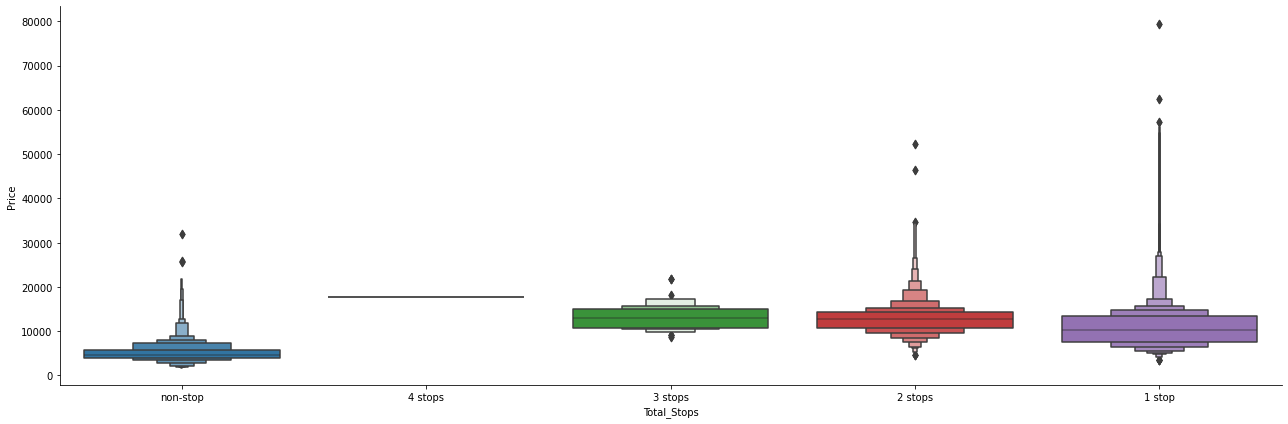

In [73]:
sns.catplot(y='Price',x='Total_Stops',data= df.sort_values('Total_Stops',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

**Checking Additional Info vs Total Stops**

<function matplotlib.pyplot.show(*args, **kw)>

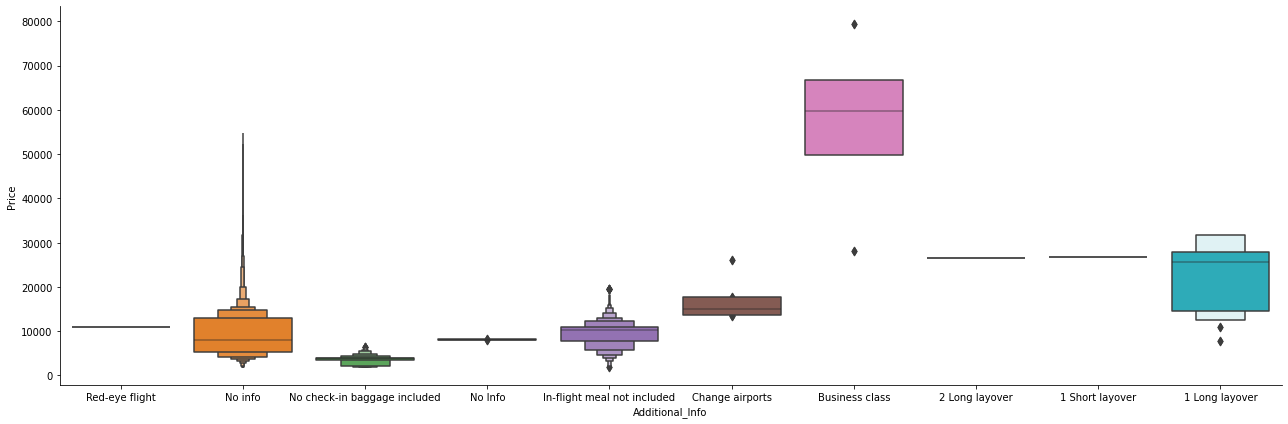

In [74]:
sns.catplot(y='Price',x='Additional_Info',data= df.sort_values('Additional_Info',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

**Checking Source and Destination Values**

In [75]:
print(df["Source"].unique())
print(df["Destination"].unique())

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


**The duration will have coorealtion with respect to the price**

In [76]:
def string_to_minutes(string):
  if 'h' not in string:
    string = "0h "+string
  if 'm' not in string:
    string = string+" 0m"
  raw = string.split(" ")
  hour = raw[0].replace("h","")
  minutes = string.split(" ")[1].replace("m","")
  return (int(hour)*60+int(minutes))

df['Duration'] = df['Duration'].map(lambda string:string_to_minutes(string))

In [77]:
corr=df['Duration'].corr(df['Price'])
print(corr)

0.506371482196048


# **ETL**

**Splitting the day of journey to to day month and year**

**Splitting departure_date as departure hour and minute**

**Splitting arrival_date as arrival hour and minute**

**Dropping Route column**

In [78]:
df['Day']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

df['Departure_Hour'] = df['Dep_Time'] .str.split(':').str[0]
df['Departure_Minute'] = df['Dep_Time'] .str.split(':').str[1]
df['Departure_Hour']=df['Departure_Hour'].astype(int)
df['Departure_Minute']=df['Departure_Minute'].astype(int)
df=df.drop(['Dep_Time'],axis=1)


df['Arrival_Hour'] = df['Arrival_Time'] .str.split(':').str[0]
df['Arrival_Minute'] = str(df['Arrival_Time'] .str.split(':').str[1]).split(" ")[0]
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df['Arrival_Minute']=df['Arrival_Minute'].astype(int)
df=df.drop(['Arrival_Time'],axis=1)

df=df.drop(['Date_of_Journey'],axis=1)
df=df.drop(['Route'],axis=1)

**Convert the text to integer lables and remove the unwanted data**

In [80]:
le= LabelEncoder()
df["Airline"]=le.fit_transform(df['Airline'])
df["Source"]=le.fit_transform(df['Source'])
df["Destination"]=le.fit_transform(df['Destination'])
df["Additional_Info"]=le.fit_transform(df['Additional_Info'])
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,3,0,5,170,non-stop,8,3897,24,03,2019,22,20,1,0
1,1,3,0,445,2 stops,8,7662,1,05,2019,5,50,13,0
2,4,2,1,1140,2 stops,8,13882,9,06,2019,9,25,4,0
3,3,3,0,325,1 stop,8,6218,12,05,2019,18,5,23,0
4,3,0,5,285,1 stop,8,13302,01,03,2019,16,50,21,0


**Convert total stops to int**

In [82]:
df['Total_Stops'].value_counts()

1 stop      11250
non-stop     6982
2 stops      3040
3 stops        90
4 stops         2
Name: Total_Stops, dtype: int64

In [83]:
df['Total_Stops']=df['Total_Stops'].fillna('1 stop')

In [85]:
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stop')

In [86]:
df['Stop'] = df['Total_Stops'].str.split(' ').str[0]
df=df.drop(['Total_Stops'],axis=1)
df.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Day,Month,Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Stop
0,3,0,5,170,8,3897,24,03,2019,22,20,1,0,0
1,1,3,0,445,8,7662,1,05,2019,5,50,13,0,2
2,4,2,1,1140,8,13882,9,06,2019,9,25,4,0,2
3,3,3,0,325,8,6218,12,05,2019,18,5,23,0,1
4,3,0,5,285,8,13302,01,03,2019,16,50,21,0,1


**Coorelation Matrix**

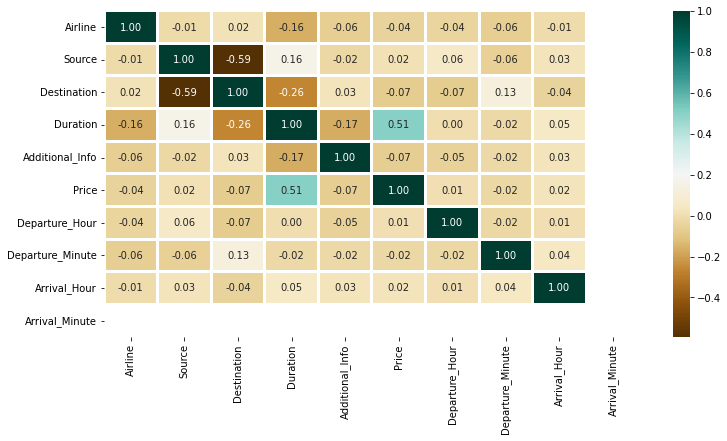

In [87]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

**Split x and y into test and train**

Taking 80% For the train and 20% for the test

In [89]:
from sklearn.model_selection import train_test_split
df = df.dropna()
y= df["Price"]
x= df.drop(['Price'],axis=1)
X_train, X_valid, Y_train, Y_valid = train_test_split(x,y, train_size=0.8, test_size=0.2, random_state=0)

In [90]:
print(X_train.shape)
print(X_valid.shape)

(17092, 13)
(4274, 13)


# **Testing With Models**

**Trying With SVM – Support vector Machine model**

In [91]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.41987029347520144


# **Auto ML Model Creation**
[Learn More](https://automl.github.io/auto-sklearn/master/examples/20_basic/example_regression.html)


In [96]:
automl = reg.AutoSklearnRegressor(time_left_for_this_task=360,per_run_time_limit=30)
automl.fit(X_train,Y_train)
print(automl.leaderboard())

/usr/local/lib/python3.8/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Day has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Month has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Year has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Stop has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is s

          rank  ensemble_weight                 type      cost   duration
model_id                                                                 
15           1             0.46    gradient_boosting  0.216234  17.639268
3            2             0.10    gradient_boosting  0.217808   6.645679
21           3             0.12          extra_trees  0.218777  24.226974
26           4             0.24    gradient_boosting  0.235088   3.255273
25           5             0.08  k_nearest_neighbors  0.244085   1.803159


In [97]:
from sklearn import metrics
import numpy as np
ypred1= automl.predict(X_train)
ypred2= automl.predict(X_valid)
train_predictions = automl.predict(X_train)
print("Train R2 score:", metrics.r2_score(Y_train, ypred1))
test_predictions = automl.predict(X_valid)
print("Test R2 score:", metrics.r2_score(Y_valid, ypred2))

Train R2 score: 0.8422150420001366
Test R2 score: 0.7935992909444938


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


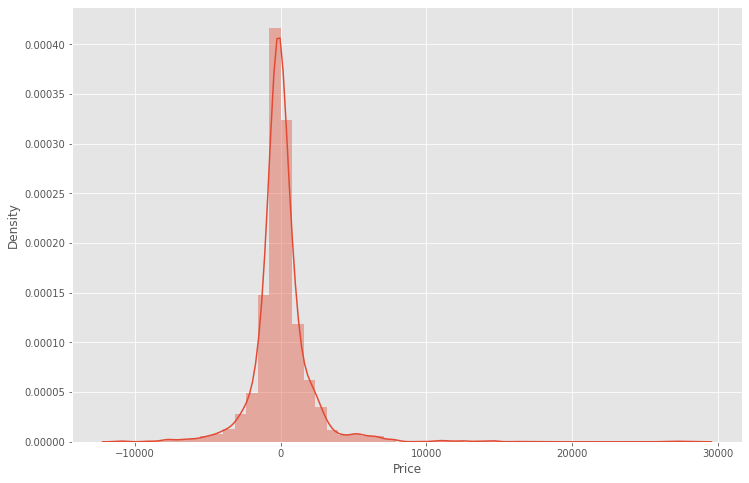

In [98]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(Y_valid-ypred2)
plt.show()

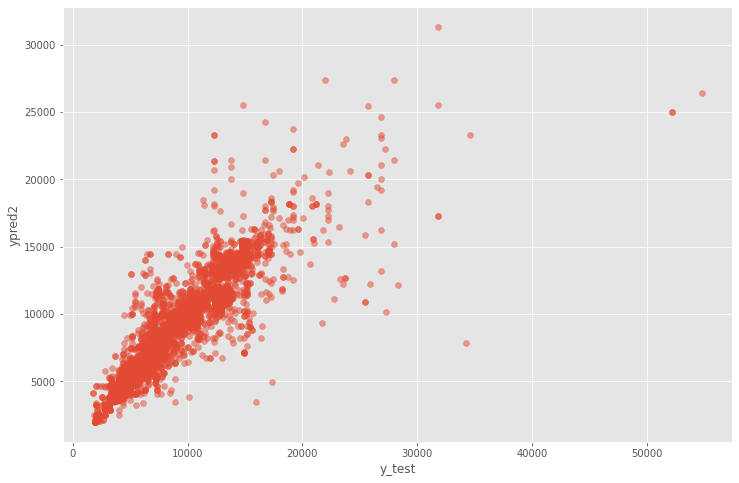

In [99]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(Y_valid, ypred2, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("ypred2")
plt.show()

**Trying With Random ForestRegressor**

[random forest regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the

In [100]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  """HTML representation of estimator.


0.03966143720573467

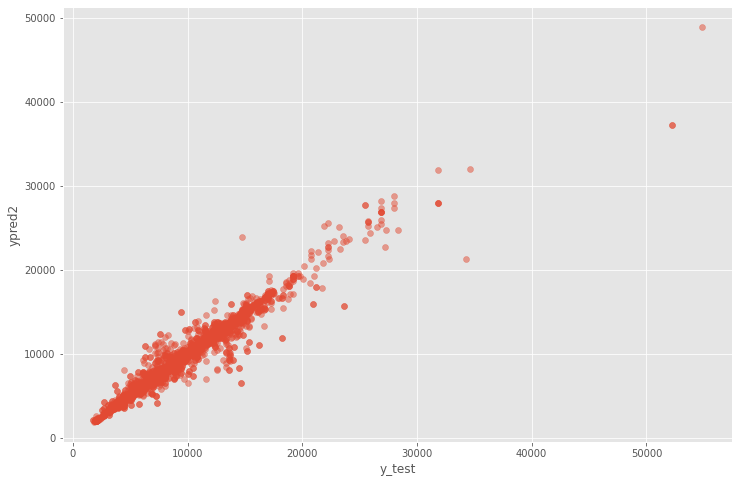

In [101]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(Y_valid, Y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("ypred2")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


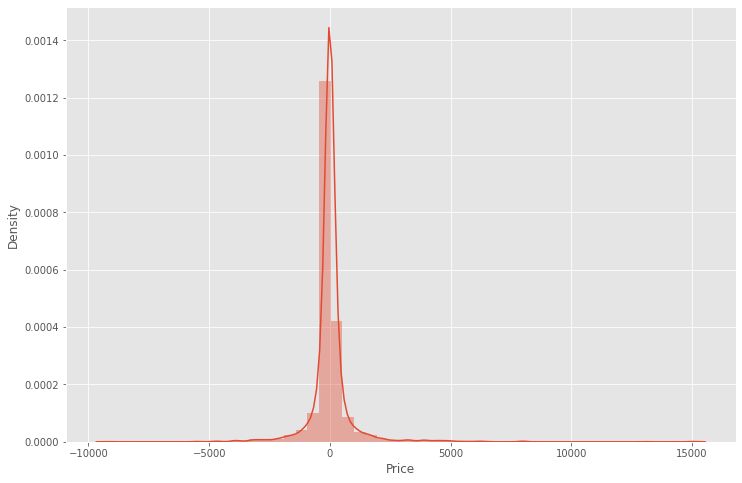

In [102]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(Y_valid-Y_pred)
plt.show()